In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

import string
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [2]:
#READ THE CSV FILE FROM PART1 - CLEANING
data = pd.read_csv('email_input.csv')

In [3]:
data.head()

,body,from,message-id,subject
0,"['Anyone', 'know', 'about', 'the', 'Weitek', '...",cavalier@blkbox.COM (Bill Egan),<1993Apr18.031714.3642@nntpxfer.psi.com>,Weitek P9000 ?
1,"['In', 'article', '1993Mar31', '140529', '1084...",arc@cco.caltech.edu (Aaron Ray Clements),<1pifnjINNscb@gap.caltech.edu>,ACLU (was Re
2,"['and', 'I', 'm', 'sure', 'that', 'people', 'w...",hrubin@pop.stat.purdue.edu (Herman Rubin),<C5sFnz.Fo1@mentor.cc.purdue.edu>,Gritz/JBS/Liberty Lobby/LaRouche/Christic Insi...
3,"['In', 'article', '1r6p8oINN8hi', 'clem', 'han...",wwarf@silver.ucs.indiana.edu (Wayne J. Warf),<C5y2r9.4D7@usenet.ucs.indiana.edu>,BD's did themselves--you're all paranoid freaks
4,"['I', 'recently', 'have', 'become', 'aware', '...",mon@cray.com (Muriel Nelson),<1993Apr15.154053.3087@hemlock.cray.com>,ABORTION and private health coverage -- letter...


In [4]:
#THE BODY OF THE EMAILS ARE GOING TO BE ANALZED AND VECTORIZED SO SIMILAR CONTENT CAN BE GROUPED UNDER THE SAME
#CLUSTER
data.body

0      ['Anyone', 'know', 'about', 'the', 'Weitek', '...
1      ['In', 'article', '1993Mar31', '140529', '1084...
2      ['and', 'I', 'm', 'sure', 'that', 'people', 'w...
3      ['In', 'article', '1r6p8oINN8hi', 'clem', 'han...
4      ['I', 'recently', 'have', 'become', 'aware', '...
                             ...                        
295    ['THE', 'ARMED', 'CITIZEN', 'Mere', 'presence'...
296    ['But', 'do', 'you', 'knew', 'how', 'much', 'o...
297    ['The', 'above', 'conveniently', 'ignores', 't...
298    ['Hallo', 'POV', 'Renderers', 'I', 've', 'got'...
299    ['Brent', 'I', 'm', 'still', 'waiting', 'to', ...
Name: body, Length: 300, dtype: object

In [5]:
#REMOVING SOME STOPWORDS I NOTICED DURING PRE-PROCESSINF AND AFTER CLUSTERING DATA MULTIPLE TIMES TO GET
#ACCURATE RESULTS
stopwords = ENGLISH_STOP_WORDS.union(['like', 'know', 'think', 'just','don','make','does','way','com','thanks','thank','ve','did','said'])
add = ['0','1','2','3','4','5','6','7','8','9','_','yes','no']
letters = list(string.ascii_lowercase)
add = add + letters
stopwords = stopwords.union(add)
print(f'Removing {len(stopwords)} stopwords from the dataset')

Removing 368 stopwords from the dataset


In [6]:
#Define the Term frequency - Inverse Document Frequency vectorizer
#max_df and min_df sets the upper bound and lower bound for search to limit unnecessary words
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)

In [7]:
#obtain the matrix using the data body as input
tfidf_matrix = tfidf_vectorizer.fit_transform(data.body)

In [8]:
#OBTAINING THE TERMS
terms = tfidf_vectorizer.get_feature_names()
print(len(terms))
print(terms[:10])

4617
['00', '000', '006', '01', '02139', '04', '05', '10', '100', '1000']


In [9]:
#COSINE SIMILARITY OF PAIRWISE ELEMENTS IS OBTAINED FROM THE TFIDF MATRIX
# EUCLIDEAN DISTANCE IS 1 - COSINE SIMILARITY
distance = 1 - cosine_similarity(tfidf_matrix)

In [10]:
#CLUSTERING THE DATA USING KMEANS CLUSTERING

#ASSUMING K = 5 AS DEFAULT

total_clusters = 5

model = KMeans(n_clusters=total_clusters)

model.fit(tfidf_matrix)

clusters = model.labels_.tolist()

In [11]:
#APPENDING A NEW COLUMN TO THE EXISTING DATAFRAME
data['group'] = clusters

In [12]:
data.head()

,body,from,message-id,subject,group
0,"['Anyone', 'know', 'about', 'the', 'Weitek', '...",cavalier@blkbox.COM (Bill Egan),<1993Apr18.031714.3642@nntpxfer.psi.com>,Weitek P9000 ?,0
1,"['In', 'article', '1993Mar31', '140529', '1084...",arc@cco.caltech.edu (Aaron Ray Clements),<1pifnjINNscb@gap.caltech.edu>,ACLU (was Re,2
2,"['and', 'I', 'm', 'sure', 'that', 'people', 'w...",hrubin@pop.stat.purdue.edu (Herman Rubin),<C5sFnz.Fo1@mentor.cc.purdue.edu>,Gritz/JBS/Liberty Lobby/LaRouche/Christic Insi...,1
3,"['In', 'article', '1r6p8oINN8hi', 'clem', 'han...",wwarf@silver.ucs.indiana.edu (Wayne J. Warf),<C5y2r9.4D7@usenet.ucs.indiana.edu>,BD's did themselves--you're all paranoid freaks,2
4,"['I', 'recently', 'have', 'become', 'aware', '...",mon@cray.com (Muriel Nelson),<1993Apr15.154053.3087@hemlock.cray.com>,ABORTION and private health coverage -- letter...,1


In [13]:
#ANALYSIS OF NUMBER OF ELEMENTS PER CLUSTER GROUP
data['group'].value_counts()

2    88
1    84
4    51
0    48
3    29
Name: group, dtype: int64

In [14]:
#SORTING ALL THE CLUSTER CENTERS BASED ON THE CLOSEST DISTANCE TO CENTROID
sorted_centroids = model.cluster_centers_.argsort()[:, ::-1] 

#OBTAINING ALL THE TOP WORDS FOR EACH CLUSTER TO CHECK IF THERE EXISTS A SIMILARITY
top_words = []
for i in range(total_clusters):
    #print("Cluster %d " % i)
    
    temp = []
    for index in sorted_centroids[i, :5]: #replace 6 with n words per cluster
        #print(' %s' % data.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        temp.append(terms[index])
    top_words.append(temp)

In [15]:
print(f'Top Words in each cluster')
for index,value in enumerate(top_words):
    print(f'Cluster {index} contains {value}.')

Top Words in each cluster
Cluster 0 contains ['graphics', 'image', 'files', 'format', 'color'].
Cluster 1 contains ['government', 'rights', 'polygon', 'abortion', 'money'].
Cluster 2 contains ['edu', 'fbi', 'batf', 'koresh', 'clinton'].
Cluster 3 contains ['homosexual', 'men', 'gay', 'cramer', 'sex'].
Cluster 4 contains ['gun', 'drug', 'guns', 'control', 'drugs'].


In [16]:
#ASSIGNING LABELS FOR CLUSTER VISUALIZATION
n0 = ','.join(n for n in top_words[0])
n1 = ','.join(n for n in top_words[1])
n2 = ','.join(n for n in top_words[2])
n3 = ','.join(n for n in top_words[3])
n4 = ','.join(n for n in top_words[4])

In [17]:
#MULTI DIMENSIONALITY SCALING OR MDS IS USED TO SCALE VARIOUS VALUES UNDER AN UMRELLA OF VALUES 
#THAT CAN BE REPRESENTED OR ANALZED EASILY

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

#THE EUCLIDEAN DISTANCES ARE SCALED TO PLOT IN A SINGLE GRAPH
positions = mds.fit_transform(distance)

x_coordinates, y_coordinates = positions[:, 0], positions[:, 1]

In [18]:
#DICTIONARY OF COLORS FOR PLOTTING ALL FIVE CLUSTERS
colors = {0: '#7570b3', 1:'#66a61e' , 2:'#1b9e77', 3: '#e7298a', 4:'#d95f02'}

#NAMES ARE LABELS TO PLOT AS LEGEND
names = {0: n0, 1: n1, 2: n2, 3: n3, 4: n4}

In [19]:
titles = data.subject.to_list()

In [20]:
#NEW DATAFRAME FOR VISUALIZATION
plot_df = pd.DataFrame(dict(x = x_coordinates, y = y_coordinates, title = titles, label = clusters)) 

#GROUP BY CLUSTER
groups = plot_df.groupby('label')

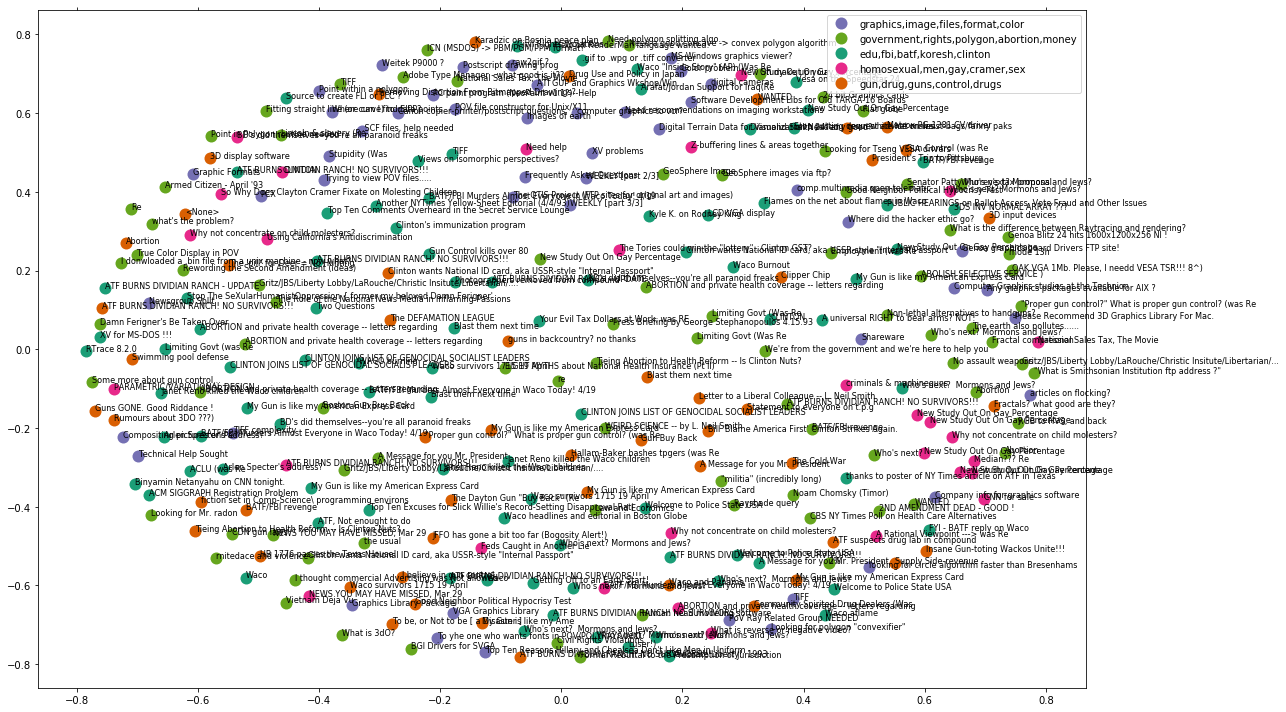

In [22]:
#PLOT WITH PADDING AND SIZE
fig, ax = plt.subplots(figsize=(18, 10))
ax.margins(0.05)


for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=names[name], color = colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis= 'x',which='both', bottom='off', top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both', left='off', top='off',labelleft='off')
    
ax.legend(numpoints=1)

#LABELLING EMAILS WITH THEIR SUBJECT
for i in range(len(plot_df)):
    ax.text(plot_df.iloc[i]['x'], plot_df.iloc[i]['y'], plot_df.iloc[i]['title'], size=8)  


plt.tight_layout()

HIERARCHIAL CLUSTERING AND VISUALIZATION USING DENDOGRAMS TO VIEW GROUPING OF EMAILS INTO EACH CLUSTER

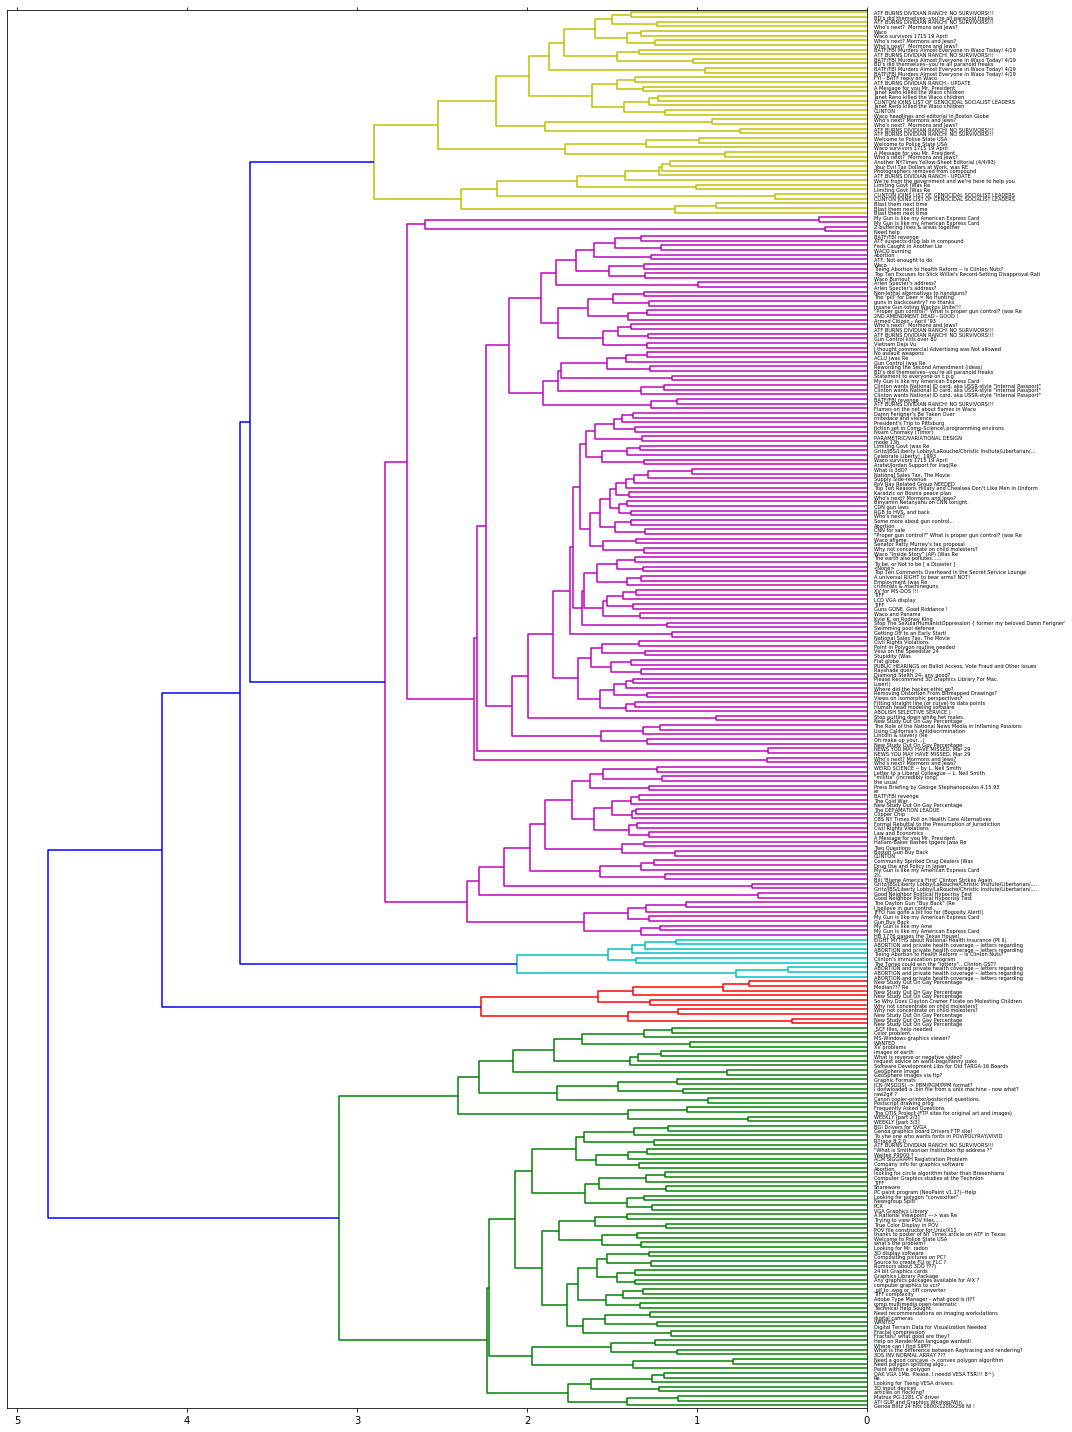

In [23]:
from scipy.cluster.hierarchy import ward, dendrogram

#USE EUCLIDEAN DISTANCE TO OBTAIN WARD ANF BUILD THE LINKAGE MATRIX
linkage_matrix = ward(distance)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="left", labels=titles);

plt.tick_params(axis= 'x', which='both', bottom='off',top='off', labelbottom='off')

plt.tight_layout()

Thus the emails have been preprocessed and clustered using K-means and Hierarchial clustering.
In both cases, it is evident that the total number of optimum clusters is five.